<a href="https://colab.research.google.com/github/huytuan3108/bai_tap_fuzzy/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,245 (6.63 MB)

 Trainable params: 1,738,245 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.1654 - loss: 2.0586
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4349 - loss: 1.4350
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6455 - loss: 0.9825
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7375 - loss: 0.5944
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8547 - loss: 0.4010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8887 - loss: 0.3016
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9195 - loss: 0.2341
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9565 - loss: 0.1446
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9679 - loss: 0.1139
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9435 - loss: 0.1864
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8859 - loss: 0.2199
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9366 - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


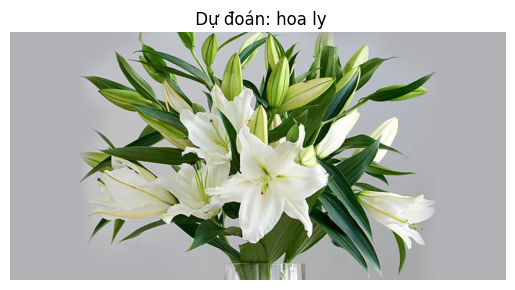

'hoa ly'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Tăng dữ liệu để tránh overfit
datagen = ImageDataGenerator(
    rotation_range=40,          # xoay ảnh ngẫu nhiên trong khoảng 40 độ
    width_shift_range=0.2,      # dịch ảnh theo chiều ngang
    height_shift_range=0.2,     # dịch ảnh theo chiều dọc
    shear_range=0.2,            # nghiêng ảnh
    zoom_range=0.2,             # phóng to/thu nhỏ
    horizontal_flip=True,       # lật ngang ảnh
    fill_mode='nearest'         # điền pixel sau khi biến đổi
)

# Danh sách ảnh gốc kèm nhãn
image_paths = [
    ("/content/hoa ly.jpeg", 0),
    ("/content/huong duong.jpg", 1),
    ("/content/hồng.jpg", 2),
    ("/content/mai.jpg", 3),
    ("/content/đào.jpg", 4)
]

X_aug = []
Y_aug = []

# Tạo mỗi ảnh gốc thành 20 ảnh mới bằng data augmentation
for img_path, label in image_paths:
    img = load_img(img_path, target_size=(32, 32))  # resize ảnh về 32x32
    x = img_to_array(img)                           # chuyển ảnh thành mảng số
    x = np.expand_dims(x, axis=0)                   # thêm 1 chiều cho đúng định dạng input

    count = 0
    for batch in datagen.flow(x, batch_size=1):
        aug_img = batch[0].astype('float32') / 255.0  # chuẩn hóa pixel
        X_aug.append(aug_img)
        Y_aug.append(label)
        count += 1
        if count >= 20:   # mỗi ảnh tạo ra 20 ảnh mới
            break

# Chuyển dữ liệu thành mảng numpy
X_aug = np.array(X_aug)
Y_aug = np.array(Y_aug)

# Ép ảnh 3D về dạng 1D để dùng cho ANN
X_aug_flat = X_aug.reshape((X_aug.shape[0], 32 * 32 * 3))

# One-hot encoding cho nhãn

Y_aug_oh = to_categorical(Y_aug, num_classes=5)

# Tạo model ANN đơn giản


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))  # input layer
model.add(Dropout(0.3))                                           # giảm overfit
model.add(Dense(256, activation='relu'))                          # hidden layer
model.add(Dense(128, activation='relu'))                          # hidden layer
model.add(Dense(5, activation='softmax'))                         # output: 5 loại hoa

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train model
model.fit(X_aug_flat, Y_aug_oh, epochs=100, batch_size=16)

# Lưu model
model.save("flower_model_ann_augmented.h5")

# Tên hoa tương ứng với label
flower_names = ["hoa ly", "huong duong", "hồng", "mai", "đào"]

# Hàm dự đoán ảnh mới
def predict_flower(image_path):
    img = Image.open(image_path).resize((32, 32)).convert('RGB')  # đọc và resize ảnh
    x = np.array(img).astype('float32') / 255.0
    x = x.reshape(1, 32*32*3)

    pred = model.predict(x)
    label = np.argmax(pred)
    flower = flower_names[label]

    # Hiển thị ảnh và tên hoa dự đoán
    import cv2
    import matplotlib.pyplot as plt
    img_show = cv2.imread(image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show)
    plt.title(f" Dự đoán: {flower}")
    plt.axis('off')
    plt.show()

    return flower

# Thử nghiệm với ảnh mới
predict_flower("/content/hoa ly.jpeg")